<a href="https://colab.research.google.com/github/amyush/Image-steganography/blob/main/Steganography_LSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Setting up the environment**

In [37]:
!git clone https://github.com/amyush/Image-steganography.git

fatal: destination path 'Image-steganography' already exists and is not an empty directory.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

# **Custom Functions**

In [39]:
def stringToBinary(a):
  l=[]
  res = ''.join(format(ord(i), '08b') for i in a)
  return res

def binaryToString(a):
  return chr(binaryToInt(a))

def integerToBinary(a):
  return int(bin(a)[2:])

def binaryToInt(binary): 
    int_val, i, n = 0, 0, 0
    while(binary != 0): 
        a = binary % 10
        int_val = int_val + a * pow(2, i) 
        binary = binary//10
        i += 1
    return int_val

def calculatePSNR(originalImage, encodedImage):
  error = np.sum((originalImage.astype('float') - encodedImage.astype('float')) ** 2)
  error /= float(originalImage.shape[0] * originalImage.shape[1]);
  if error == 0:
      return 100
  PIXEL_MAX = 255.0
  return 20 * math.log10(PIXEL_MAX / math.sqrt(error))

# **Steganography**

## **Hiding the data**

In [44]:
def encodingMessage(imageName, key, message):
  imgPath ="Image-steganography/"
  inputImage = cv2.imread(imgPath + imageName, cv2.IMREAD_UNCHANGED);
  outputImage = inputImage
  delimeter = "#@#@#@"
  height= inputImage.shape[0]
  width = inputImage.shape[1]
  dim = 1
  if(len(inputImage.shape) > 2):
    dim = inputImage.shape[2]

  binKey = stringToBinary(key)
  binMsg = stringToBinary(message + delimeter)
  lenBinKey = len(binKey)
  lenBinMsg = len(binMsg)

  index = -1
  count = 0
  pixel = 0

  for k in range(dim):
    for i in range(0, height, 1):
      for j in range(0, width, 1):
        index = index + 1;
        if((int)(binKey[index%lenBinKey]) == 1):
          if(count < lenBinMsg):
            if(dim == 1):
              pixel = integerToBinary(inputImage[i][j])
              newPixel = ((int)(pixel/10)*10) + (int)(binMsg[count])
              outputImage[i][j] = binaryToInt(newPixel);
            else:
              pixel = integerToBinary(inputImage[i][j][k])   
              newPixel = ((int)(pixel/10)*10) + (int)(binMsg[count])
              outputImage[i][j][k] = binaryToInt(newPixel);
            count = count + 1;
  psnr = calculatePSNR(inputImage, outputImage)
  cv2.imwrite(imgPath + "encodedImage.png", outputImage)
  return psnr, inputImage, outputImage;

## **Extracting the data**

In [45]:
def extractData(key):
  imgPath ="Image-steganography/"
  inputImage = cv2.imread(imgPath + 'encodedImage.png');
  height= inputImage.shape[0]
  width = inputImage.shape[1]
  dim = inputImage.shape[2]
  
  binKey = stringToBinary(key)
  lenBinKey = len(binKey)
  delimeter = "#@#@#@"
  index = -1
  lenPixel = 0
  exMsg = ""
  newPixel = 0

  for k in range(dim):
    for i in range(0, height, 1):
      for j in range(0, width, 1):
        index += 1
        if((int)(binKey[index%lenBinKey]) == 1):
            pixel = integerToBinary(inputImage[i][j][k])
            newPixel = newPixel * 10 + pixel%10
            lenPixel += 1
            if(lenPixel == 8):
              exMsg += binaryToString(newPixel)
              lenPixel = 0
              newPixel = 0
              if("#@#@#@" in exMsg):
                return exMsg[:-6]
              

# **Results**

Enter the filename: (eg- Cover_1.png or Cover_2.png)Cover_1.png
Enter the key:awdwad
Enter the message to be hidden:aiojwdijawodawd
Extracted message = aiojwdijawodawd


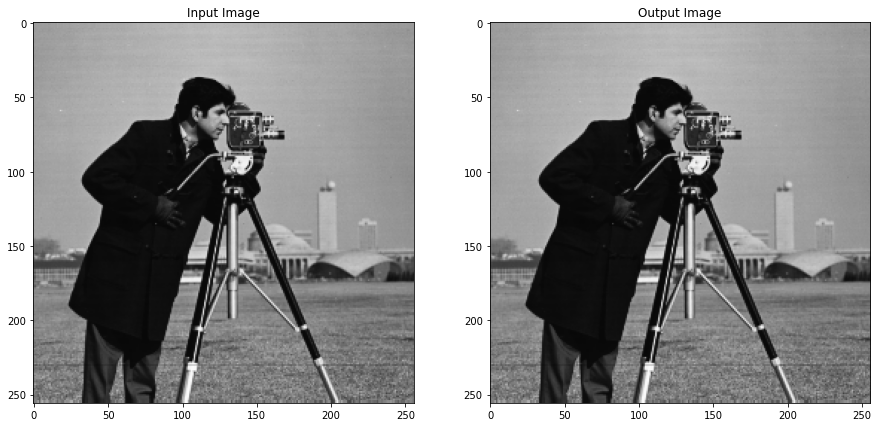

In [46]:
fileName = input("Enter the filename: (eg- Cover_1.png or Cover_2.png)")
key = input("Enter the key:")
message = input("Enter the message to be hidden:")

psnr, inputImage, outputImage = encodingMessage(fileName, key, message)
extractedMessage = extractData(key)

plt.figure(figsize=(15,15));
plt.subplot(1,2,1),plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB)), plt.title("Input Image")
plt.subplot(1,2,2),plt.imshow(cv2.cvtColor(outputImage, cv2.COLOR_BGR2RGB)), plt.title("Output Image") 
print("Extracted message = {}".format(extractedMessage))

In [47]:
print("Psnr value = {}".format(psnr))

Psnr value = 100
